In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

We have two types of dataset.


1.  FraudTrain = will be used as df_train,it is a train dataset.
2.  FraudTest = will be used as df_train,it is a test dataset.



In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df_train=pd.read_csv("/content/gdrive/MyDrive/Fraud Detection/fraudTrain.csv")

df_test= pd.read_csv("/content/gdrive/MyDrive/Fraud Detection/fraudTest.csv")

In [5]:
#Creating a new data set with zero duplicates.
df_train = df_train[~df_train["Unnamed: 0"].duplicated()]
print(df_train.shape)

(1296675, 23)


In [6]:
#looking into train data and checking all columns
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:
#checking all the null values
df_train.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
# checking the shape of df_train
df_train.shape

(1296675, 23)

In [9]:
# looking into the row where null values
np.where(pd.isnull(df_train))

(array([], dtype=int64), array([], dtype=int64))

In [10]:
#As per above code, we got to know that null values are present in the last rows. confirming the same.
df_train.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [11]:
#We are filling up the null values with the mode vlaues for all columns.
df_train['gender'].fillna(df_train['gender'].mode(), inplace=True)
df_train['street'].fillna(df_train['street'].mode(), inplace=True)
df_train['city'].fillna(df_train['city'].mode(), inplace=True)
df_train['state'].fillna(df_train['state'].mode(), inplace=True)
df_train['zip'].fillna(df_train['zip'].mode(), inplace=True)
df_train['lat'].fillna(df_train['lat'].mode(), inplace=True)
df_train['long'].fillna(df_train['long'].mode(), inplace=True)
df_train['city_pop'].fillna(df_train['city_pop'].mode(), inplace=True)
df_train['job'].fillna(df_train['job'].mode(), inplace=True)
df_train['dob'].fillna(df_train['dob'].mode(), inplace=True)
df_train['trans_num'].fillna(df_train['trans_num'].mode(), inplace=True)
df_train['unix_time'].fillna(df_train['unix_time'].median(), inplace=True)
df_train['merch_lat'].fillna(df_train['merch_lat'].median(), inplace=True)
df_train['merch_long'].fillna(df_train['merch_long'].median(), inplace=True)
df_train['is_fraud'].fillna(0, inplace=True)  # Assuming is_fraud is a binary variable

In [12]:
#rechecking all the null values
df_train.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [13]:
#rechecking the null values.
df_train.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [14]:
# We dropped null value as it was there for one line
df_train.dropna(inplace=True)

In [15]:
# rechecking and confirming there is no any null values present
df_train.tail(1)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.3,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.18611,0


In [16]:
#checking the shape dataset
df_train.shape

(1296675, 23)

In [17]:
# information about the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [18]:
# Descriptive analysis of data sets
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [19]:
#looking into test data and checking all columns
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [20]:
#checking all the test data
df_test.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [21]:
#printing the null values row
df_test.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [22]:
# Dropping all the null values
df_test.dropna(inplace=True)

In [23]:
# Rechecking the null values
df_test.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

### EDA
TYPES OF EXPLORATORY DATA ANALYSIS:

1. Univariate Non-graphical
2. Multivariate Non-graphical
3. Univariate graphical
4. Multivariate graphical

In [24]:
#using dob columns, we are calculating the customer ages for train and test dataset.
def convert_dob_to_age(dob):
  import datetime
  today = datetime.date.today()
  try:
    dob = datetime.date.fromisoformat(dob)
  except ValueError:
    return None
  age = today.year - dob.year
  if today.month < dob.month or (today.month == dob.month and today.day < dob.day):
    age -= 1
  return age

df_train['age'] = df_train['dob'].apply(convert_dob_to_age)

In [25]:
#rounding of the latitude and longitude values with 2 decimals points
df_train['lat_dist'] = abs(round(df_train['merch_lat']-df_train['lat'],2))
df_train['long_dist'] = abs(round(df_train['merch_long']-df_train['long'],2))

In [26]:
#last columns [AGE] mentioned the age of customers
df_train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,lat_dist,long_dist
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,35,0.07,0.87
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,45,0.27,0.02
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,62,0.97,0.11
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,57,0.80,0.45
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,37,0.25,0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,62,0.88,0.79
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,44,0.36,0.74
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,56,0.68,0.69
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,43,0.56,0.70


In [27]:
# converting dob into age for df_test

df_test['age'] = df_test['dob'].apply(convert_dob_to_age)

In [28]:
df_test['lat'] = df_test['lat'].astype(float)
df_test['long'] = df_test['long'].astype(float)
df_test['lat_dist'] = abs(round(df_test['merch_lat']-df_test['lat'],2))
df_test['long_dist'] = abs(round(df_test['merch_long']-df_test['long'],2))

In [29]:
df_test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,lat_dist,long_dist
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,55,0.02,0.27
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,34,0.87,0.48
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,53,0.18,0.66
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,36,0.24,0.06
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,68,0.71,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,58,0.55,0.56
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,24,0.62,0.75
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,42,0.46,0.81
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,58,0.15,0.63


In [30]:
df_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'age', 'lat_dist', 'long_dist'],
      dtype='object')

In [31]:
df_test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'age', 'lat_dist', 'long_dist'],
      dtype='object')

In [32]:
#dropping the columns ["Unnamed: 0","lat","long",'merch_lat','merch_long'] as it is not required.
df_train.drop(columns=["Unnamed: 0","lat","long",'merch_lat','merch_long'],inplace=True)

In [33]:
#dropping the columns ["Unnamed: 0","lat","long",'merch_lat','merch_long'] as it is not required.
df_test.drop(columns=["Unnamed: 0","lat","long",'merch_lat','merch_long',],inplace=True)

In [34]:
#checking columns for train set
df_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'is_fraud', 'age', 'lat_dist',
       'long_dist'],
      dtype='object')

In [35]:
#checking columns for test set
df_test.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'is_fraud', 'age', 'lat_dist',
       'long_dist'],
      dtype='object')

In [36]:
#Assning Yes and No
is_fraud = df_train["is_fraud"].value_counts()
print("Yes: ",is_fraud[1])
print("No: ",is_fraud[0])

Yes:  7506
No:  1289169


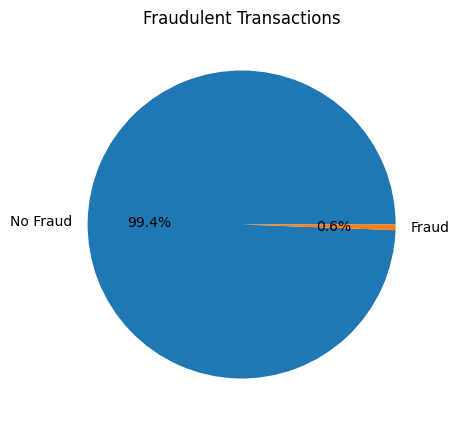

In [37]:
# Get the counts of fraudulent and non-fraudulent transactions
is_fraud = df_train["is_fraud"].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(is_fraud, labels=["No Fraud", "Fraud"], autopct="%1.1f%%")
plt.title("Fraudulent Transactions")
plt.show()

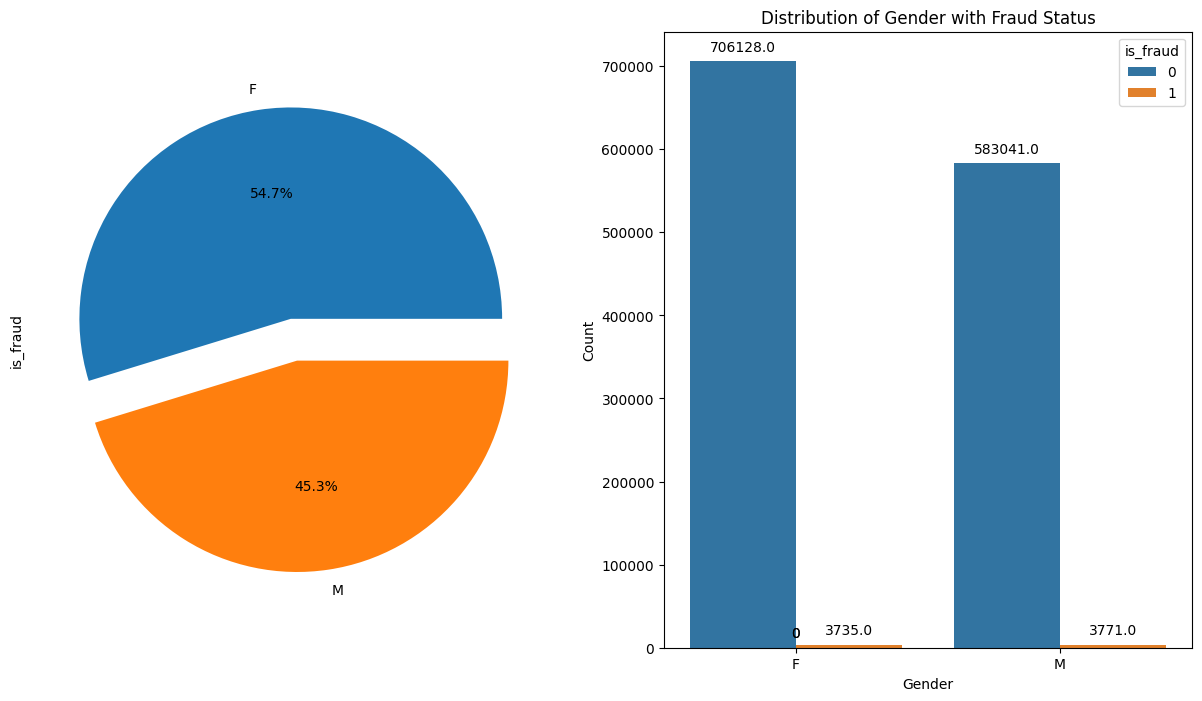

In [38]:
fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(15, 8))

#Gender Distribution
explode = [0.1, 0.1]
df_train.groupby('gender')['is_fraud'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);

ax = sns.countplot(x="gender", hue="is_fraud", data=df_train,ax=axb[1])

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.title("Distribution of Gender with Fraud Status")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()

### *Females are doing more transactions but males are more likely to make fraud transaction*

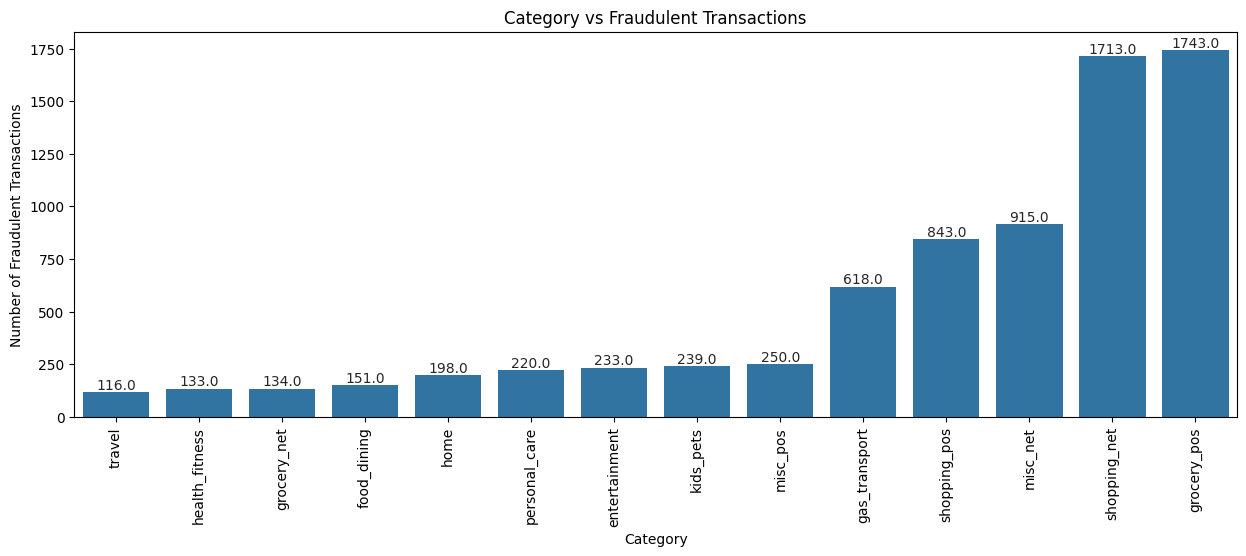

In [39]:
fraud_counts_cat = df_train.groupby("category")["is_fraud"].sum()

fraud_counts_cat = fraud_counts_cat.sort_values(ascending=True)

plt.figure(figsize=(15, 5))
sns.barplot(x=fraud_counts_cat.index, y=fraud_counts_cat.values)
sns.set_style("dark")

for i, bar in enumerate(plt.gca().patches):
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                   str(bar.get_height()), ha='center', va='bottom')


plt.title("Category vs Fraudulent Transactions")
plt.xlabel("Category")
plt.ylabel("Number of Fraudulent Transactions")
plt.xticks(rotation=90)


plt.show()


We saw that most of the fraud trascation happend for grocery_pos and shopping_net

In [40]:
#creating defined bins for age categories
age_ranges = {
    "Child": (0, 13),
    "Teen": (13, 20),
    "Adult": (20, 65),
    "Senior": (65, None)}

In [41]:
df_train["age_group"] = np.where(df_train["age"] < 13, "Child", np.where(df_train["age"] < 20, "Teen", np.where(df_train["age"] < 55, "Adult", "Senior")))

In [42]:
df_test["age_group"] = np.where(df_test["age"] < 13, "Child", np.where(df_test["age"] < 20, "Teen", np.where(df_test["age"] < 55, "Adult", "Senior")))

In [43]:
fraud_counts_age = df_train.groupby("age_group")["is_fraud"].sum()

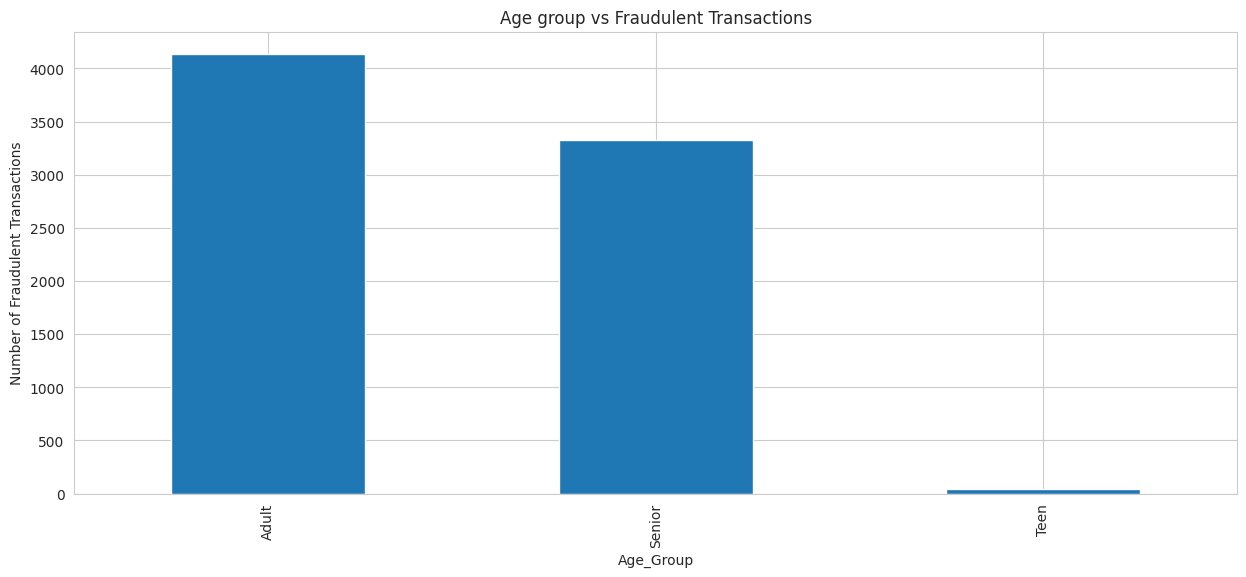

CPU times: user 318 ms, sys: 111 ms, total: 429 ms
Wall time: 311 ms


In [44]:
%%time
plt.figure(figsize=(15,6))
sns.set_style("whitegrid")
fraud_counts_age.plot(kind="bar")
plt.xlabel("Age_Group")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Age group vs Fraudulent Transactions")
plt.xticks(rotation=90)
plt.show()

### **Adult are more likely to make fraud transaction**

In [45]:
#separating numeric and categorical features
numeric_data = df_train.select_dtypes(include=[np.number])
categorical_data = df_train.select_dtypes(exclude=[np.number])

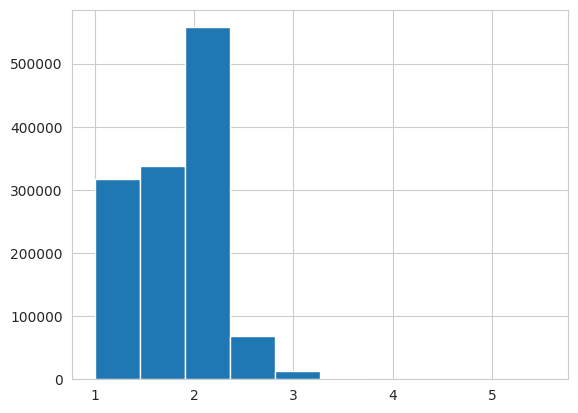

In [46]:
(df_train['amt']**(1/6)).hist()
plt.show()

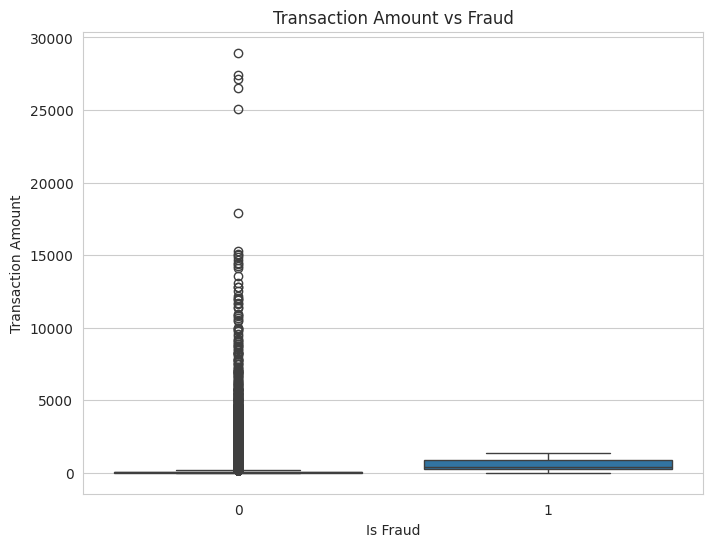

In [47]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'is_fraud' , y = 'amt' , data = df_train)
plt.title("Transaction Amount vs Fraud")
plt.xlabel("Is Fraud")
plt.ylabel("Transaction Amount")
plt.show()

<Figure size 2400x2400 with 0 Axes>

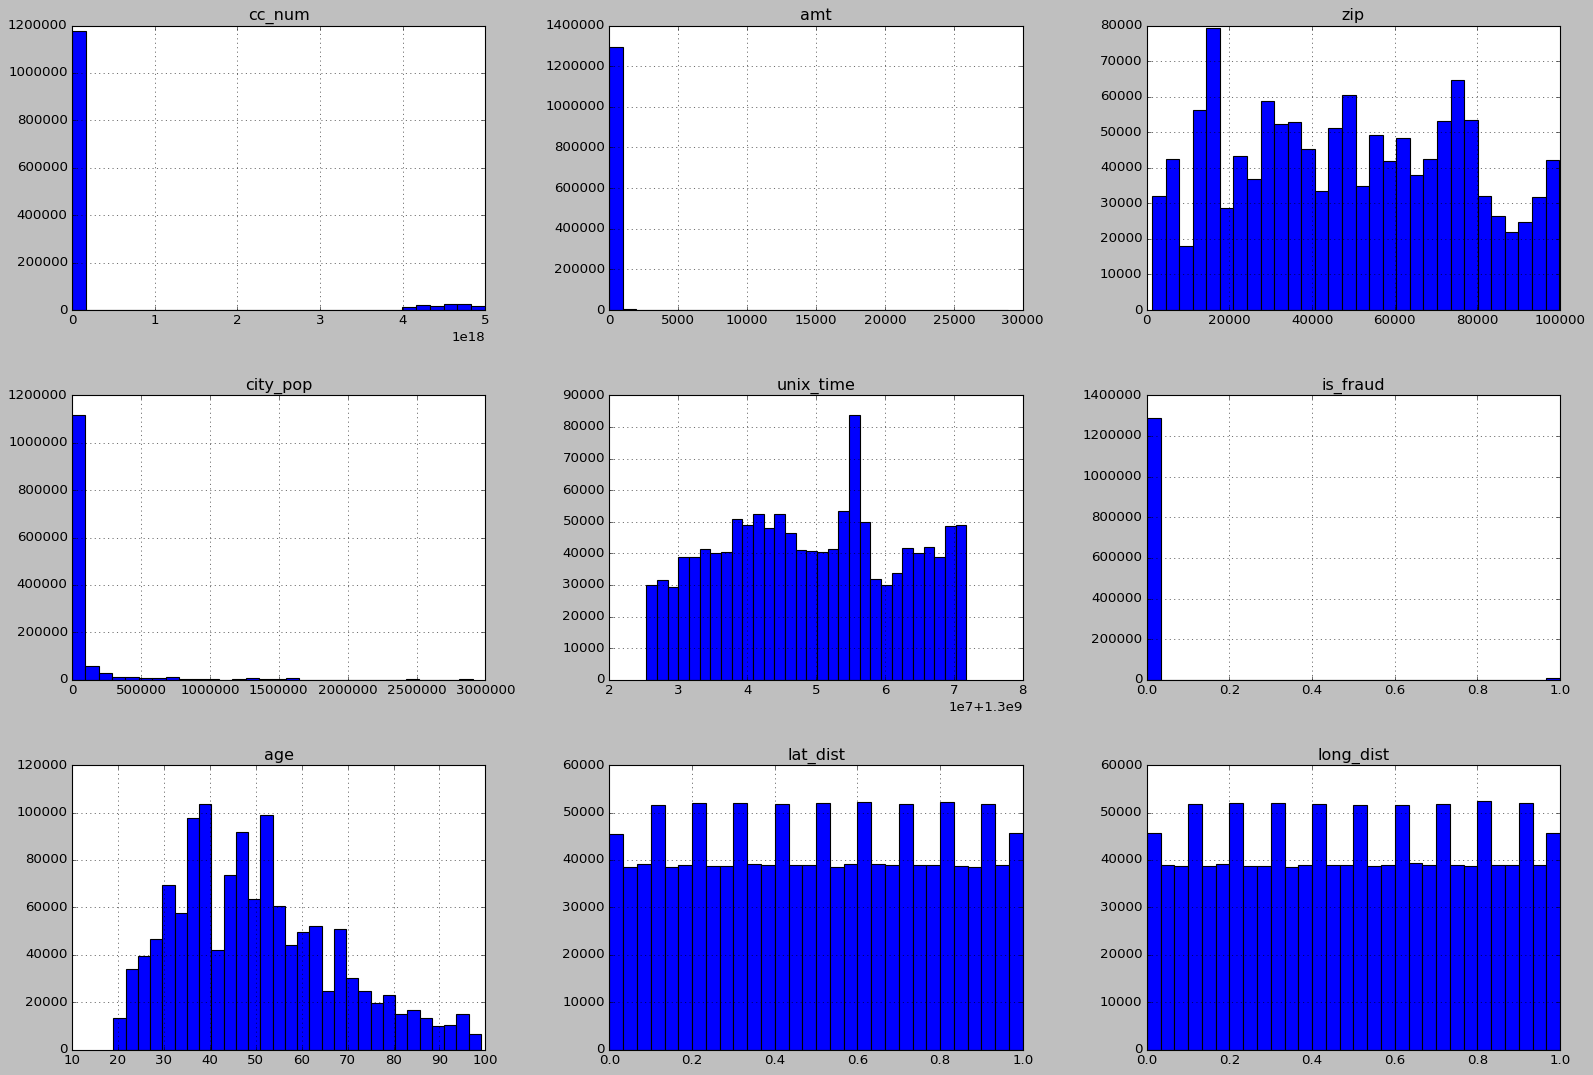

In [48]:
plt.figure(figsize = (24,24))
plt.style.use('classic')
df_train[numeric_data.columns].hist(bins=30, figsize = (24,16))
plt.show()

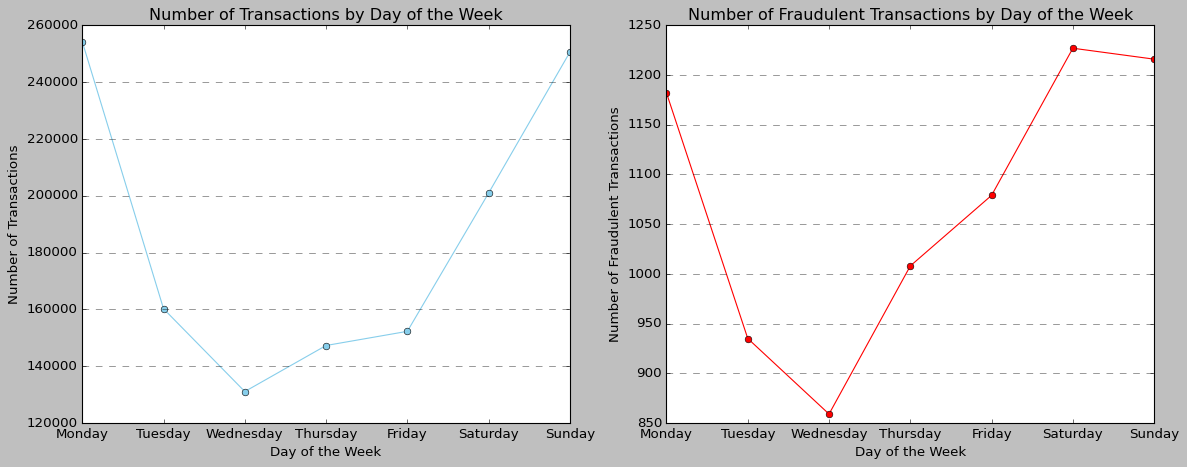

In [49]:
# Convert transaction time column to datetime format
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])

# Filter the data to only retain transactions with is_fraud equal to 1
fraud_data = df_train[df_train['is_fraud'] == 1]


# Extract day of week from transaction time column in fraud data
fraud_data['days_of_week'] = fraud_data['trans_date_trans_time'].dt.dayofweek

# Name the days of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Count the number of transactions for each day of the week
transactions_per_day = df_train['trans_date_trans_time'].dt.dayofweek.value_counts().sort_index()

# Count the number of fraudulent transactions for each day of the week
fraud_transactions_per_day = fraud_data['days_of_week'].value_counts().sort_index()

# Draw two parallel column charts
plt.figure(figsize=(15, 6))

# Graph for total transactions for each day
plt.subplot(1, 2, 1)
plt.plot(days_of_week, transactions_per_day.values, color='skyblue', marker='o', linestyle='-')

plt.title('Number of Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Graph for number of fraudulent transactions per day
plt.subplot(1, 2, 2)
plt.plot(days_of_week, fraud_transactions_per_day.values, color='red', marker='o', linestyle='-')

plt.title('Number of Fraudulent Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Fraudulent Transactions')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### ***Fraud transactions occur most frequently on Mondays, Saturdays and Sundays***

In [50]:
#calculating the fraud_correlations
fraud_correlation = df_train.corr()['is_fraud'].abs().sort_values(ascending=False)
print(fraud_correlation)

is_fraud     1.000000
amt          0.219404
age          0.012377
unix_time    0.005078
zip          0.002162
city_pop     0.002136
cc_num       0.000981
lat_dist     0.000642
long_dist    0.000183
Name: is_fraud, dtype: float64


In [51]:
df_train['gender'] = df_train['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df_test['gender'] = df_test['gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [52]:
dummies = pd.get_dummies(df_train, drop_first=True, dtype="int32",
        columns=["age_group", "gender"])

In [53]:
new_df = dummies
new_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,street,city,state,...,job,dob,trans_num,unix_time,is_fraud,age,lat_dist,long_dist,age_group_Senior,age_group_Teen
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,561 Perry Cove,Moravian Falls,NC,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,0,35,0.07,0.87,0,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,43039 Riley Greens Suite 393,Orient,WA,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,0,45,0.27,0.02,0,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,594 White Dale Suite 530,Malad City,ID,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,0,62,0.97,0.11,1,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,9443 Cynthia Court Apt. 038,Boulder,MT,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,0,57,0.80,0.45,1,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,408 Bradley Rest,Doe Hill,VA,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,0,37,0.25,0.83,0,0


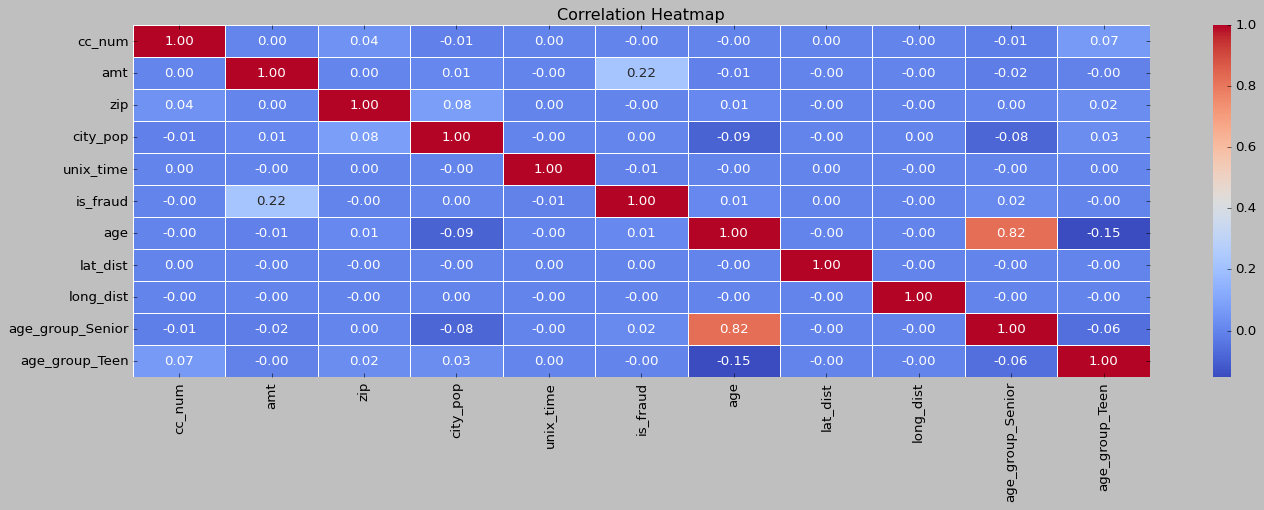

In [146]:
# Calculate correlation matrix
correlation_matrix = new_df.corr()

# Plotting a heatmap
plt.style.use('classic')
plt.figure(figsize=(20.5,5.5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [55]:
new_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'street', 'city', 'state', 'zip', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'is_fraud', 'age', 'lat_dist',
       'long_dist', 'age_group_Senior', 'age_group_Teen'],
      dtype='object')

In [56]:
new_df.drop(columns=['merchant', 'job', 'category', 'city','dob','first',"last","street","trans_num","state",'trans_date_trans_time'],inplace=True)

In [57]:
new_df.head()

,cc_num,amt,zip,city_pop,unix_time,is_fraud,age,lat_dist,long_dist,age_group_Senior,age_group_Teen
0,2703186189652095,4.97,28654,3495,1325376018,0,35,0.07,0.87,0,0
1,630423337322,107.23,99160,149,1325376044,0,45,0.27,0.02,0,0
2,38859492057661,220.11,83252,4154,1325376051,0,62,0.97,0.11,1,0
3,3534093764340240,45.00,59632,1939,1325376076,0,57,0.80,0.45,1,0
4,375534208663984,41.96,24433,99,1325376186,0,37,0.25,0.83,0,0


In [58]:
df_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,is_fraud,age,lat_dist,long_dist,age_group
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,0,351 Darlene Green,Columbia,...,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,0,55,0.02,0.27,Senior
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,0,3638 Marsh Union,Altonah,...,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,0,34,0.87,0.48,Adult
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,0,9333 Valentine Point,Bellmore,...,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,0,53,0.18,0.66,Adult
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,0,32941 Krystal Mill Apt. 552,Titusville,...,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,0,36,0.24,0.06,Adult
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,0,5783 Evan Roads Apt. 465,Falmouth,...,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,0,68,0.71,0.87,Senior


In [113]:
df_test.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'is_fraud', 'age', 'lat_dist',
       'long_dist', 'age_group'],
      dtype='object')

In [114]:
dummies2 = pd.get_dummies(df_test, drop_first=True, dtype="int32",
        columns=["gender",'age_group'])

In [115]:
dummies2.drop(columns=['merchant', 'job', 'category', 'city','dob','first',"last","street","trans_num","state",'trans_date_trans_time'],inplace=True)

In [116]:
dummies2.head()

,cc_num,amt,zip,city_pop,unix_time,is_fraud,age,lat_dist,long_dist,age_group_Senior,age_group_Teen
0,2291163933867244,2.86,29209,333497,1371816865,0,55,0.02,0.27,1,0
1,3573030041201292,29.84,84002,302,1371816873,0,34,0.87,0.48,0,0
2,3598215285024754,41.28,11710,34496,1371816893,0,53,0.18,0.66,0,0
3,3591919803438423,60.05,32780,54767,1371816915,0,36,0.24,0.06,0,0
4,3526826139003047,3.19,49632,1126,1371816917,0,68,0.71,0.87,1,0


In [63]:
new_df

,cc_num,amt,zip,city_pop,unix_time,is_fraud,age,lat_dist,long_dist,age_group_Senior,age_group_Teen
0,2703186189652095,4.97,28654,3495,1325376018,0,35,0.07,0.87,0,0
1,630423337322,107.23,99160,149,1325376044,0,45,0.27,0.02,0,0
2,38859492057661,220.11,83252,4154,1325376051,0,62,0.97,0.11,1,0
3,3534093764340240,45.00,59632,1939,1325376076,0,57,0.80,0.45,1,0
4,375534208663984,41.96,24433,99,1325376186,0,37,0.25,0.83,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,15.56,84735,258,1371816728,0,62,0.88,0.79,1,0
1296671,6011149206456997,51.70,21790,100,1371816739,0,44,0.36,0.74,0,0
1296672,3514865930894695,105.93,88325,899,1371816752,0,56,0.68,0.69,1,0
1296673,2720012583106919,74.90,57756,1126,1371816816,0,43,0.56,0.70,0,0


# Model Making

In [64]:
x = new_df.drop('is_fraud',axis = 1)
y = new_df['is_fraud']

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score

In [66]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=75)

In [67]:
X_train.head()

,cc_num,amt,zip,city_pop,unix_time,age,lat_dist,long_dist,age_group_Senior,age_group_Teen
1238147,3543591270174051,10.29,15920,922,1370027035,51,0.20,0.18,0,0
1257800,4586810168620942,140.88,29438,2408,1370627871,26,0.21,0.08,0,0
1126941,2305336922781618,46.57,52572,1132,1365905536,63,0.74,0.52,1,0
747007,3511058278399773,63.31,47863,205,1353032393,64,0.99,0.34,1,0
627153,6011366578560244,70.52,17051,4653,1348407412,26,0.34,0.27,0,0


In [68]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Using Recusrive Feature Elimination

In [70]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [71]:
from sklearn.linear_model import *
from  sklearn import metrics
#Rsquared on test set
y_pred_lr = rfe.predict(X_test)
metrics.r2_score(y_test, y_pred_lr)

0.05188142674597185

Using Multiple Linear Regression

In [72]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

lm.fit(X_train, y_train)
#Rsquared on test set
y_pred_lr = lm.predict(X_test)
metrics.r2_score(y_test, y_pred_lr)

0.05188142674597185

Using Random Forest Regressor

In [73]:
%%time
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(bootstrap= True,n_estimators = 200, random_state = 42, max_depth=4,max_features=None,min_samples_leaf= 2,min_samples_split= 4)
rf_regressor.fit(X_train, y_train)

CPU times: user 5min 6s, sys: 335 ms, total: 5min 7s
Wall time: 5min 18s


RandomForestRegressor(max_depth=4, max_features=None, min_samples_leaf=2,
                      min_samples_split=4, n_estimators=200, random_state=42)

In [74]:
y_pred_train = rf_regressor.predict(X_train)
print(r2_score(y_train, y_pred_train))

0.27528730904624243


In [75]:
y_pred_test = rf_regressor.predict(X_test)
print(r2_score(y_test, y_pred_test))

0.26932069444164564


Using Gradient Boosting Regressor

In [76]:
from sklearn.ensemble import GradientBoostingRegressor

# Your other parameters
gbr_params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    # Specify the correct loss function here
    'loss': 'squared_error',  # You can also use 'ls' instead of 'squared_error'
    # Other parameters...
}

# Create the GradientBoostingRegressor
gbr = GradientBoostingRegressor(**gbr_params)

# Fit the model
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [77]:
y_pred_train=gbr.predict(X_train)
#
# Print Coefficient of determination R^2
print("R_squared in train set: ",r2_score(y_train, y_pred_train))

R_squared in train set:  0.30072004265965335


In [78]:
y_pred_test=gbr.predict(X_test)
#
# Print Coefficient of determination R^2
print("R_squared in test set: ",r2_score(y_test, y_pred_test))

R_squared in test set:  0.28421830601305986


[2.49589112e-03 9.08926802e-01 5.34511272e-03 1.71670146e-02
 1.34677194e-02 5.06778352e-02 7.95422609e-04 6.05316556e-04
 5.18885387e-04 0.00000000e+00]


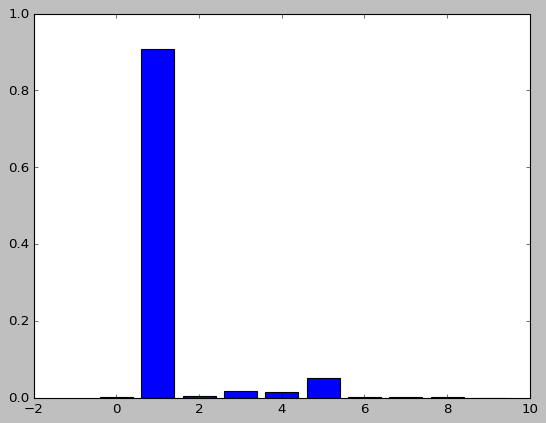

In [78]:
# plot feature importance
# feature importance
print(gbr.feature_importances_)
# plot
plt.bar(range(len(gbr.feature_importances_)), gbr.feature_importances_)
plt.show()

<Axes: >

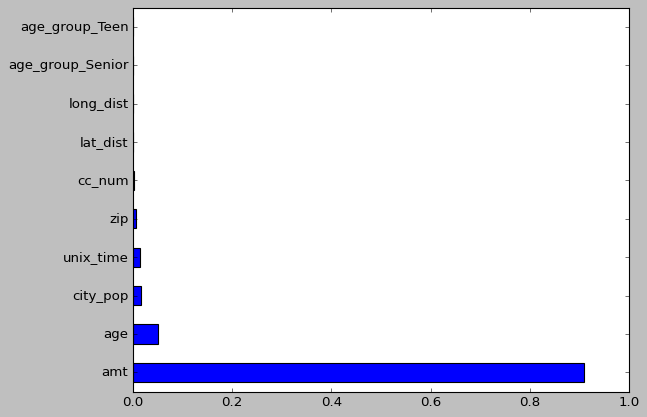

In [79]:
feat_importances = pd.Series(gbr.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')

Further Experiments

Using XGBoost Regressor

In [80]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

In [81]:
# define model
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('R_squared: %.3f (%.3f)' % (scores.mean(), scores.std()) )

R_squared: 0.364 (0.017)


In [82]:
# evaluate model
scores = cross_val_score(model, X_test, y_test, scoring='r2', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('R_squared: %.3f (%.3f)' % (scores.mean(), scores.std()) )

R_squared: 0.282 (0.029)


In [83]:
from xgboost import XGBRegressor
# define model
RegModel=XGBRegressor(max_depth=4, learning_rate=0.01, n_estimators=500, objective='reg:linear', booster='gbtree')

In [84]:
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=XGB.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

train score:  0.2543391925931159
test score:  0.2411019524508511



Using Adaboost Regressor

In [85]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor(n_estimators=500,learning_rate=0.1)
Adaboost=ada_reg.fit(X_train,y_train)
prediction=Adaboost.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=Adaboost.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

train score:  -0.7211054589179153
test score:  -0.6944577254709245


Using ElasticNet : Hybrid Regularized Model

In [86]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [87]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

In [88]:
for a in alphas:
    model = ElasticNet(alpha=a).fit(X_train,y_train)
    score = model.score(X_train,y_train)
    pred_y = model.predict(X_test)
    mse = mean_squared_error(y_test, pred_y)
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.05, MSE:0.01, RMSE:0.07
Alpha:0.0010, R2:0.05, MSE:0.01, RMSE:0.07
Alpha:0.0100, R2:0.04, MSE:0.01, RMSE:0.07
Alpha:0.1000, R2:0.00, MSE:0.01, RMSE:0.08
Alpha:0.3000, R2:0.00, MSE:0.01, RMSE:0.08
Alpha:0.5000, R2:0.00, MSE:0.01, RMSE:0.08
Alpha:0.7000, R2:0.00, MSE:0.01, RMSE:0.08
Alpha:1.0000, R2:0.00, MSE:0.01, RMSE:0.08


In [89]:
elastic=ElasticNet(alpha=0.001).fit(X_train, y_train)
y_pred = elastic.predict(X_test)
score = elastic.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.051, MSE:0.01, RMSE:0.07


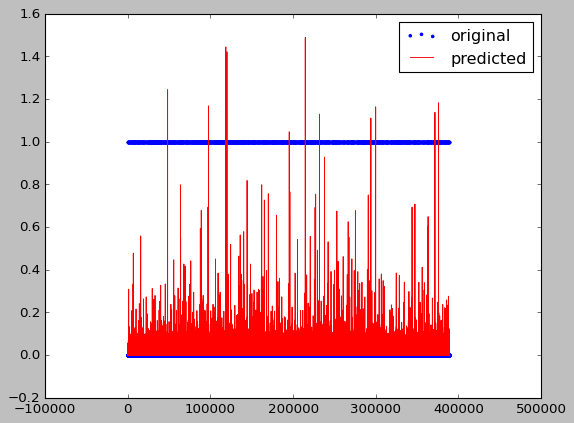

In [90]:
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [91]:
elastic_cv=ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(X_train, y_train)
print("Alpha: ",model.alpha_)
print("Intercept: ",model.intercept_)

Alpha:  0.0001
Intercept:  0.005752077843097504


In [92]:
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.052, MSE:0.01, RMSE:0.07


Using LightGBM

In [93]:
plt.style.use('ggplot')
import lightgbm as ltb

In [94]:
model = ltb.LGBMRegressor()
model.fit(X_train, y_train)
print(); print(model)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1559
[LightGBM] [Info] Number of data points in the train set: 907672, number of used features: 10
[LightGBM] [Info] Start training from score 0.005752

LGBMRegressor()


In [95]:
y_pred = model.predict(X_test)
print("Rsqaured on test data: ",metrics.r2_score(y_test, y_pred))

Rsqaured on test data:  0.3147682116399708


Model Evaluation: Hyperparameter Tuning

In [101]:
import logging
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
# Hyperparameter grid with reduced combinations
params = {
    'max_depth': [3, 4],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 500],
    'colsample_bytree': [0.3, 0.7]
}
# Create XGBoost regressor
xgbr = xgb.XGBRegressor(random_state=20)
# Use parallelization with n_jobs parameter
clf = GridSearchCV(estimator=xgbr,
                   param_grid=params,
                   scoring='r2',
                   verbose=1,
                   n_jobs=-1)  # Set n_jobs to -1 to use all available CPU cores
logger.info("Starting grid search...")
# Fit the model
clf.fit(X_train, y_train)
logger.info("Grid search completed.")
# Print the best parameters
logger.info("Best parameters: %s", clf.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [102]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
# define the model with best resulted parameters
RegModel=XGBRegressor(colsample_bytree= 0.7, max_depth=3, learning_rate=0.5, n_estimators=1000, objective='reg:linear', booster='gbtree')
xgbr = xgb.XGBRegressor(seed = 20)
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=XGB.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

train score:  0.3979203402107758
test score:  0.31175924786072773


In [103]:

from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
# define the model with best resulted parameters
RegModel=XGBRegressor(colsample_bytree= 0.7, max_depth=3, learning_rate=0.5, n_estimators=1000, objective='reg:linear', booster='gbtree')
xgbr = xgb.XGBRegressor(seed = 20)
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=XGB.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

train score:  0.3979203402107758
test score:  0.31175924786072773


So, we can finalize fine tuned XGBoost as well as it is giving us 99.5% Rsqaured on test data

Prediction on Unseen Data

In [117]:
new_df.columns

Index(['cc_num', 'amt', 'zip', 'city_pop', 'unix_time', 'is_fraud', 'age',
       'lat_dist', 'long_dist', 'age_group_Senior', 'age_group_Teen'],
      dtype='object')

In [118]:
dummies2.columns

Index(['cc_num', 'amt', 'zip', 'city_pop', 'unix_time', 'is_fraud', 'age',
       'lat_dist', 'long_dist', 'age_group_Senior', 'age_group_Teen'],
      dtype='object')

In [120]:
dummies2.drop(columns=['is_fraud'],inplace=True)

In [121]:
dummies2.columns

Index(['cc_num', 'amt', 'zip', 'city_pop', 'unix_time', 'age', 'lat_dist',
       'long_dist', 'age_group_Senior', 'age_group_Teen'],
      dtype='object')

In [122]:
test_data = sc.fit_transform(dummies2)

In [123]:
test_data = pd.DataFrame(test_data)

In [124]:
#Making predictions
final_predictions = XGB.predict(test_data)
final_prediction_series = pd.Series(final_predictions)

In [136]:
#Combine result into dataframe

import pandas as pd
df = pd.DataFrame(final_prediction_series, columns=['amt'])
df.head()


,amt
0,-0.009796
1,-0.003505
2,-0.005391
3,-0.001092
4,0.000383


In [137]:
#Combining the results into dataframe
submission_df = pd.DataFrame(final_prediction_series, columns=['is_fraud'])

In [138]:
submission_df.sample(10)

,is_fraud
196720,0.003371
490252,0.001088
161115,-0.001978
128989,0.026544
210182,0.001216
443538,0.008551
338640,0.001267
179604,-0.003243
169324,-0.001446
222816,0.217672


from matplotlib import pyplot as plt
_df_2['is_fraud'].plot(kind='hist', bins=20, title='is_fraud')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['is_fraud'].plot(kind='line', figsize=(8, 4), title='is_fraud')
plt.gca().spines[['top', 'right']].set_visible(False)

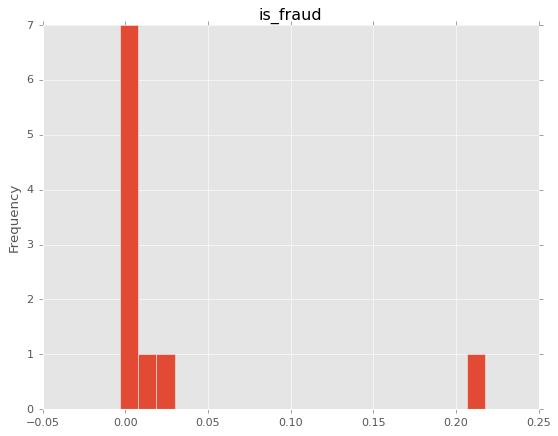

In [140]:
from matplotlib import pyplot as plt
_df_2['is_fraud'].plot(kind='hist', bins=20, title='is_fraud')
plt.gca().spines[['top', 'right',]].set_visible(False)